## 1

In [1]:
import pandas as pd
import plotly.express as px

plotly 사용

In [8]:
df_lab = pd.read_csv("../../../delete/Demo Patient Experience Data_NHC.csv")
df_lab.head()

,Unnamed: 0,Entry Code,Feedback Date,Patient Age,Staff Rating,Speed Rating,Wait Time (minutes),Test Type,Review
0,0,1,2022-10-22,61,5,3,29,Urine Test,I couldn't have asked for better service from ...
1,1,2,2022-01-12,26,3,4,171,Biopsy,I'm indifferent about the service provided by ...
2,2,3,2022-04-06,53,3,5,176,Urine Test,My experience with the staff was neither good ...
3,3,4,2022-12-11,40,4,5,94,CT Scan,"I might consider returning for future tests, b..."
4,4,5,2022-10-31,96,2,1,165,Biopsy,"The service was poor, there are serious improv..."


In [9]:
df_lab = df_lab.drop("Unnamed: 0", axis=1)
df_lab.head()

,Entry Code,Feedback Date,Patient Age,Staff Rating,Speed Rating,Wait Time (minutes),Test Type,Review
0,1,2022-10-22,61,5,3,29,Urine Test,I couldn't have asked for better service from ...
1,2,2022-01-12,26,3,4,171,Biopsy,I'm indifferent about the service provided by ...
2,3,2022-04-06,53,3,5,176,Urine Test,My experience with the staff was neither good ...
3,4,2022-12-11,40,4,5,94,CT Scan,"I might consider returning for future tests, b..."
4,5,2022-10-31,96,2,1,165,Biopsy,"The service was poor, there are serious improv..."


In [10]:
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Entry Code           20000 non-null  int64 
 1   Feedback Date        20000 non-null  object
 2   Patient Age          20000 non-null  int64 
 3   Staff Rating         20000 non-null  int64 
 4   Speed Rating         20000 non-null  int64 
 5   Wait Time (minutes)  20000 non-null  int64 
 6   Test Type            20000 non-null  object
 7   Review               20000 non-null  object
dtypes: int64(5), object(3)
memory usage: 1.2+ MB


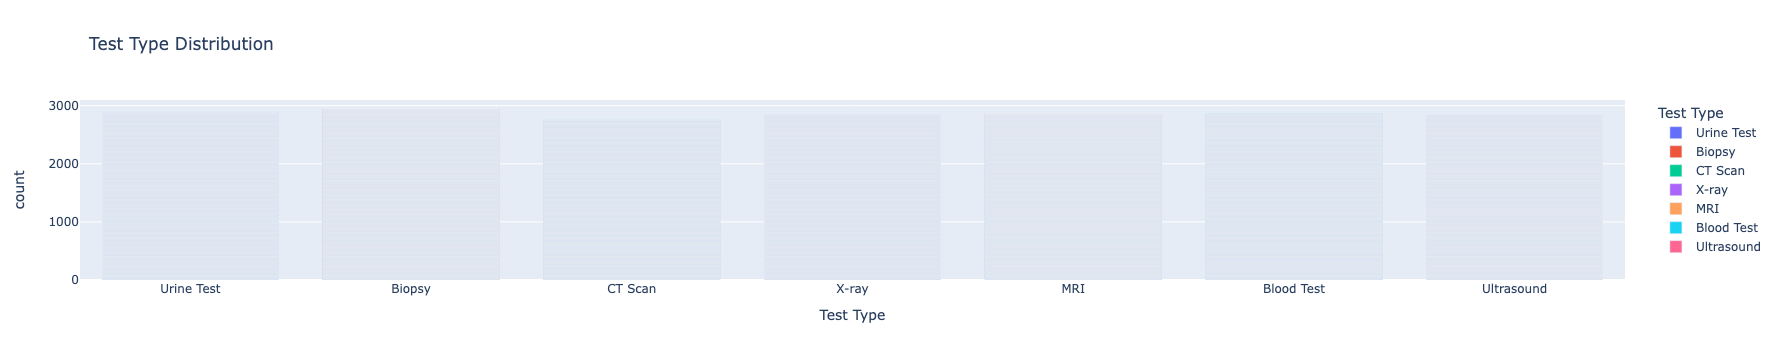

In [12]:
px.bar(df_lab,x="Test Type", title="Test Type Distribution", color ="Test Type")

bar plot으로 test type 살펴보기

근데 육안으로 보기에 좋아보이진 않은 차이..

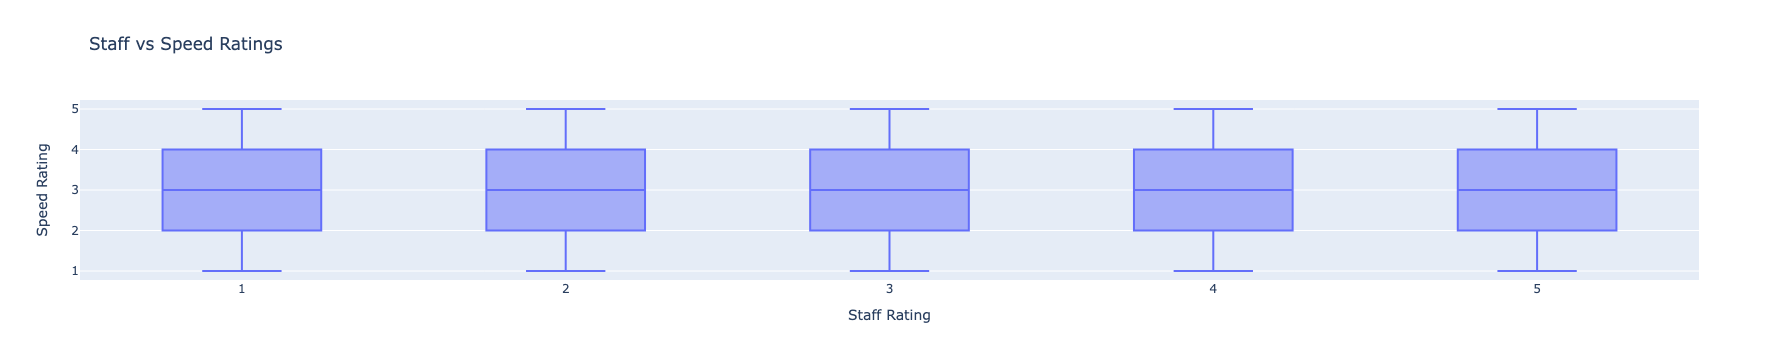

In [13]:
fig = px.box(df_lab,x="Staff Rating", y="Speed Rating", title="Staff vs Speed Ratings")
fig.show()

box plot, staff rating 별로 speed rating이 별 차이 없어보임

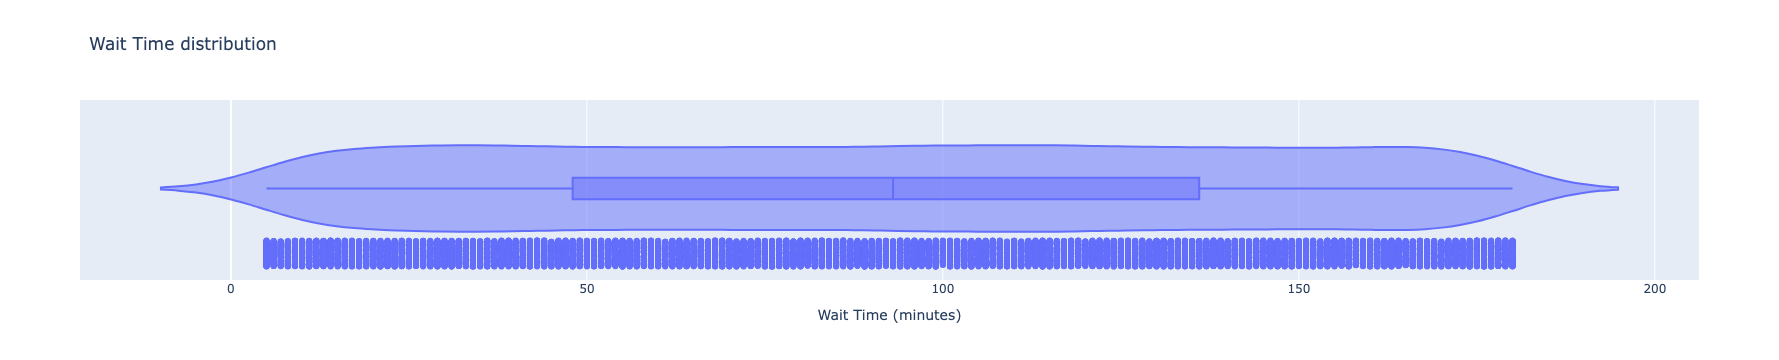

In [16]:
px.violin(df_lab,x="Wait Time (minutes)", title = "Wait Time distribution", box=True, points="all")

violin은 잘 안 쓰이긴 하는데 히스토그램처럼 분포볼때 좋음

box True 옵션으로 boxplot과 함께 보기 가능, default는 false

개별 관측값을 보기 위해서 points='all'을 넣기도 함 points='outliers'로 이상치 보기 가능

## 2

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [24]:
df_experience  = pd.read_csv("../../../delete/Demo Patient Experience Data_NHC.csv")
df_experience.head()

,Unnamed: 0,Entry Code,Feedback Date,Patient Age,Staff Rating,Speed Rating,Wait Time (minutes),Test Type,Review
0,0,1,2022-10-22,61,5,3,29,Urine Test,I couldn't have asked for better service from ...
1,1,2,2022-01-12,26,3,4,171,Biopsy,I'm indifferent about the service provided by ...
2,2,3,2022-04-06,53,3,5,176,Urine Test,My experience with the staff was neither good ...
3,3,4,2022-12-11,40,4,5,94,CT Scan,"I might consider returning for future tests, b..."
4,4,5,2022-10-31,96,2,1,165,Biopsy,"The service was poor, there are serious improv..."


In [25]:
df_experience['Review'][0]

"I couldn't have asked for better service from the staff, it was top-notch.. I had a fantastic experience, everything went smoothly and quickly.. The staff's expertise and dedication made my visit truly exceptional.. The staff was outstanding, I couldn't be happier with their service.. The staff was outstanding, I couldn't be happier with their service.. I couldn't have asked for better service from the staff, it was top-notch."

In [26]:
TextBlob(df_experience['Review'][0])

TextBlob("I couldn't have asked for better service from the staff, it was top-notch.. I had a fantastic experience, everything went smoothly and quickly.. The staff's expertise and dedication made my visit truly exceptional.. The staff was outstanding, I couldn't be happier with their service.. The staff was outstanding, I couldn't be happier with their service.. I couldn't have asked for better service from the staff, it was top-notch.")

단지 `TextBlob`에 씌우기만 하면 TextBlob 내에서 분석하기 좋은 행동이 된다.

In [27]:
TextBlob(df_experience['Review'][0]).sentiment

Sentiment(polarity=0.58, subjectivity=0.765)

리뷰 텍스트의 감성 분석 결과를 수치로 반환

`polarity` 감정이 긍정 ? 부정 ?

`subjectivity` 객관적? 주관적??

In [28]:
df_experience['Polarity'] = df_experience['Review'].apply(lambda x : TextBlob(x).polarity)
df_experience

,Unnamed: 0,Entry Code,Feedback Date,Patient Age,Staff Rating,Speed Rating,Wait Time (minutes),Test Type,Review,Polarity
0,0,1,2022-10-22,61,5,3,29,Urine Test,I couldn't have asked for better service from ...,0.580000
1,1,2,2022-01-12,26,3,4,171,Biopsy,I'm indifferent about the service provided by ...,0.262121
2,2,3,2022-04-06,53,3,5,176,Urine Test,My experience with the staff was neither good ...,0.031506
3,3,4,2022-12-11,40,4,5,94,CT Scan,"I might consider returning for future tests, b...",0.171875
4,4,5,2022-10-31,96,2,1,165,Biopsy,"The service was poor, there are serious improv...",-0.421429
...,...,...,...,...,...,...,...,...,...,...
19995,19995,19996,2022-09-01,34,3,2,128,CT Scan,"It was okay, the staff's performance was nothi...",0.173214
19996,19996,19997,2022-05-26,80,2,4,84,Blood Test,"I was quite disappointed, and there is a lot o...",-0.194444
19997,19997,19998,2022-11-01,60,2,1,76,Ultrasound,"I was quite disappointed, and there is a lot o...",0.125000
19998,19998,19999,2022-10-09,62,1,5,16,Biopsy,There are no redeeming qualities about the ser...,-0.434091


In [29]:
df_experience['Subjectivity'] = df_experience['Review'].apply(lambda x : TextBlob(x).subjectivity)
df_experience

,Unnamed: 0,Entry Code,Feedback Date,Patient Age,Staff Rating,Speed Rating,Wait Time (minutes),Test Type,Review,Polarity,Subjectivity
0,0,1,2022-10-22,61,5,3,29,Urine Test,I couldn't have asked for better service from ...,0.580000,0.765000
1,1,2,2022-01-12,26,3,4,171,Biopsy,I'm indifferent about the service provided by ...,0.262121,0.650000
2,2,3,2022-04-06,53,3,5,176,Urine Test,My experience with the staff was neither good ...,0.031506,0.548752
3,3,4,2022-12-11,40,4,5,94,CT Scan,"I might consider returning for future tests, b...",0.171875,0.446875
4,4,5,2022-10-31,96,2,1,165,Biopsy,"The service was poor, there are serious improv...",-0.421429,0.650000
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19996,2022-09-01,34,3,2,128,CT Scan,"It was okay, the staff's performance was nothi...",0.173214,0.638095
19996,19996,19997,2022-05-26,80,2,4,84,Blood Test,"I was quite disappointed, and there is a lot o...",-0.194444,0.483333
19997,19997,19998,2022-11-01,60,2,1,76,Ultrasound,"I was quite disappointed, and there is a lot o...",0.125000,0.515000
19998,19998,19999,2022-10-09,62,1,5,16,Biopsy,There are no redeeming qualities about the ser...,-0.434091,0.740909


긍부정 결과와 객주관적 결과를 변수로 apply이용하여 할당

In [30]:
df_experience['Sentiment'] = df_experience['Polarity'].apply(lambda x : "Positive" if x > 0 else "Neutral" if x ==0 else "Negative")
df_experience

,Unnamed: 0,Entry Code,Feedback Date,Patient Age,Staff Rating,Speed Rating,Wait Time (minutes),Test Type,Review,Polarity,Subjectivity,Sentiment
0,0,1,2022-10-22,61,5,3,29,Urine Test,I couldn't have asked for better service from ...,0.580000,0.765000,Positive
1,1,2,2022-01-12,26,3,4,171,Biopsy,I'm indifferent about the service provided by ...,0.262121,0.650000,Positive
2,2,3,2022-04-06,53,3,5,176,Urine Test,My experience with the staff was neither good ...,0.031506,0.548752,Positive
3,3,4,2022-12-11,40,4,5,94,CT Scan,"I might consider returning for future tests, b...",0.171875,0.446875,Positive
4,4,5,2022-10-31,96,2,1,165,Biopsy,"The service was poor, there are serious improv...",-0.421429,0.650000,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19996,2022-09-01,34,3,2,128,CT Scan,"It was okay, the staff's performance was nothi...",0.173214,0.638095,Positive
19996,19996,19997,2022-05-26,80,2,4,84,Blood Test,"I was quite disappointed, and there is a lot o...",-0.194444,0.483333,Negative
19997,19997,19998,2022-11-01,60,2,1,76,Ultrasound,"I was quite disappointed, and there is a lot o...",0.125000,0.515000,Positive
19998,19998,19999,2022-10-09,62,1,5,16,Biopsy,There are no redeeming qualities about the ser...,-0.434091,0.740909,Negative


수치화된 결과를 문자형으로 수정

In [31]:
sentiment_counts = df_experience['Sentiment']. value_counts()
sentiment_counts

Positive    12740
Negative     7242
Neutral        18
Name: Sentiment, dtype: int64

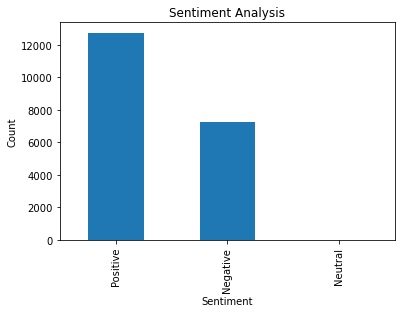

In [32]:
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

중립 결과는 없음